# **House Prices - Advanced Regression Techniques**
Predict sales prices and practice feature engineering, RFs, and gradient boosting

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Описание признаков
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


In [ ]:
!pip install -q catboost shap

In [ ]:
import warnings

import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", mpl.MatplotlibDeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif',
        font_scale=1, color_codes=False, rc=None)

In [ ]:
data = pd.read_csv("train.csv")
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
holdout = pd.read_csv("test.csv")
print(holdout.shape)
holdout.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

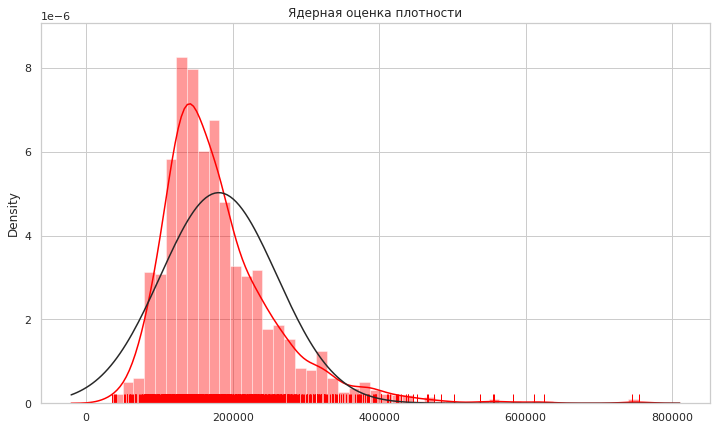

In [ ]:
x = sps.norm.rvs(data['SalePrice'])
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 7))
    plt.title("Ядерная оценка плотности")
    sns.distplot(x, rug=True, fit=sps.norm, color='red')

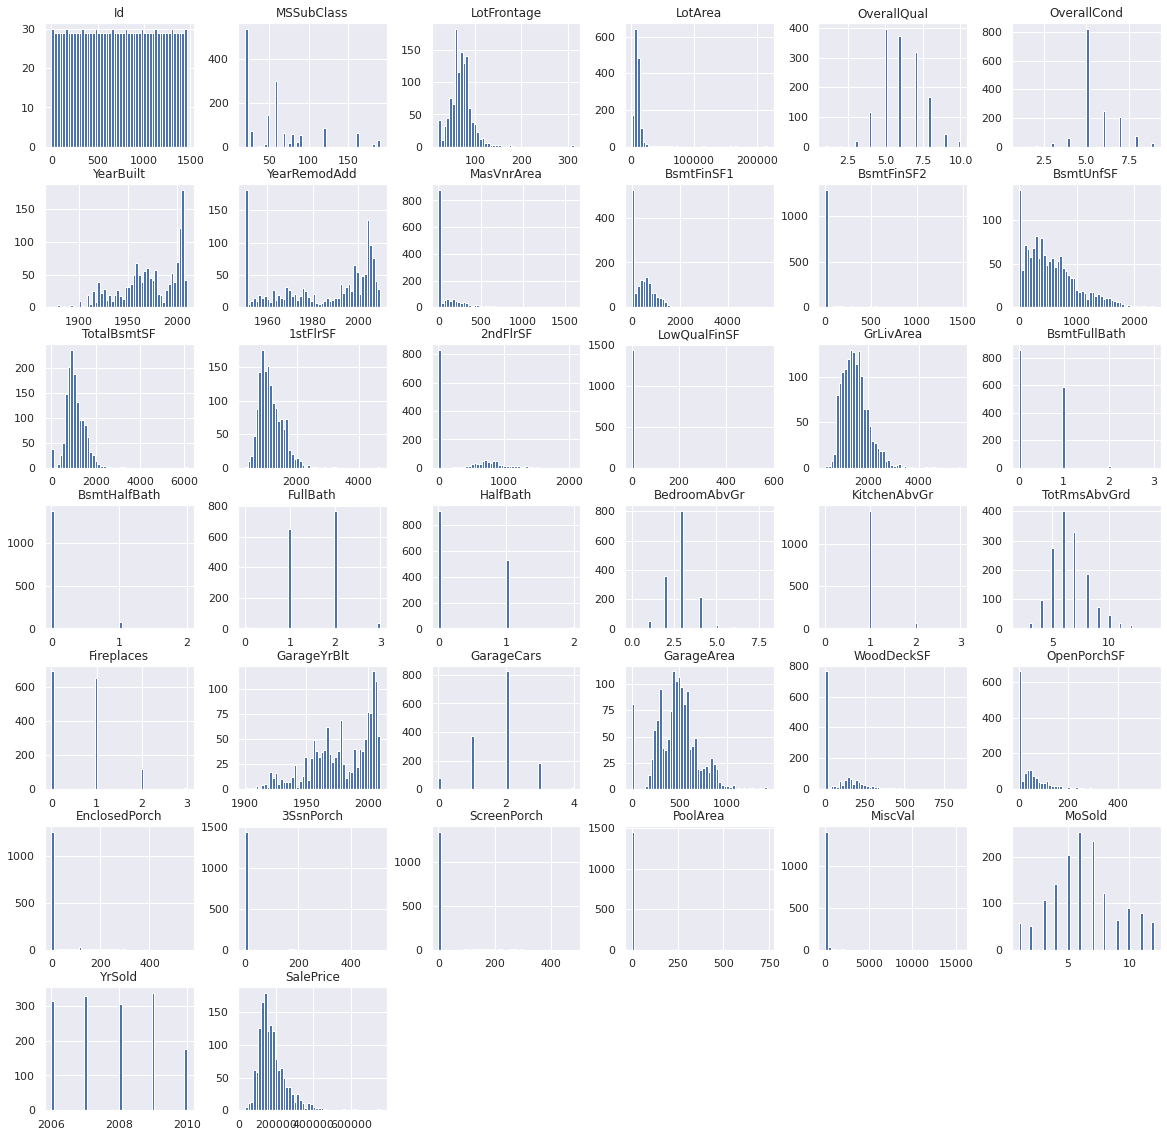

In [ ]:
#Histogram for each numerical attribute
data.hist(bins=50, figsize=(20,20))
plt.show()

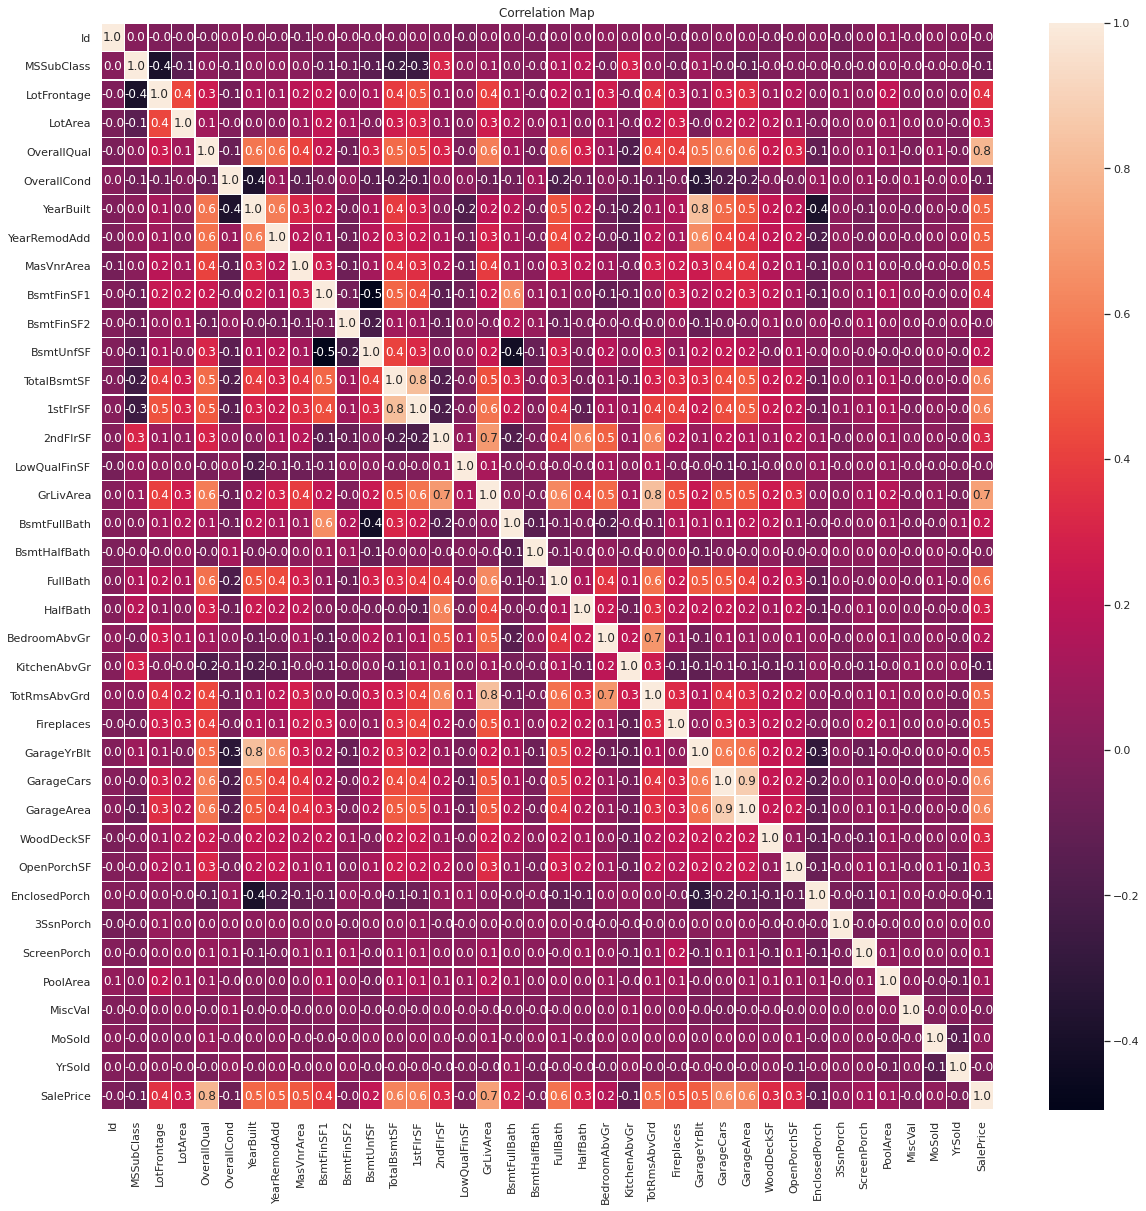

In [ ]:
f, ax=plt.subplots(figsize = (20,20))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [ ]:
data_id = data['Id']
y = data['SalePrice']
data = data.drop(['SalePrice','Id'], axis = 1)
holdout_id = holdout['Id']
holdout = holdout.drop(['Id'], axis=1)

In [ ]:
total_null = data.isnull().sum().sort_values(ascending=False) 
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(
    ascending=False)
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 
                                                                 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [ ]:
total_null = holdout.isnull().sum().sort_values(ascending=False)
percentage = (holdout.isnull().sum() / holdout.isnull().count()).sort_values(
    ascending=False)
missing_holdout = pd.concat([total_null, percentage], axis=1,
                            keys=['Total', 'Percentage'])
missing_holdout.head(20)

,Total,Percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


In [ ]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                  'LotFrontage'], axis=1)

In [ ]:
holdout = holdout.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
                        'FireplaceQu', 'LotFrontage'], axis=1)

In [ ]:
for feature in list(data.columns):
    print(f'Feature {feature}')
    display(data[feature].value_counts())
    print('-' * 40)

Feature MSSubClass


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

----------------------------------------
Feature MSZoning


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

----------------------------------------
Feature LotArea


7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

----------------------------------------
Feature Street


Pave    1454
Grvl       6
Name: Street, dtype: int64

----------------------------------------
Feature LotShape


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

----------------------------------------
Feature LandContour


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

----------------------------------------
Feature Utilities


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

----------------------------------------
Feature LotConfig


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

----------------------------------------
Feature LandSlope


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

----------------------------------------
Feature Neighborhood


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

----------------------------------------
Feature Condition1


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

----------------------------------------
Feature Condition2


Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

----------------------------------------
Feature BldgType


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

----------------------------------------
Feature HouseStyle


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

----------------------------------------
Feature OverallQual


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

----------------------------------------
Feature OverallCond


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

----------------------------------------
Feature YearBuilt


2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

----------------------------------------
Feature YearRemodAdd


1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

----------------------------------------
Feature RoofStyle


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

----------------------------------------
Feature RoofMatl


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

----------------------------------------
Feature Exterior1st


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

----------------------------------------
Feature Exterior2nd


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

----------------------------------------
Feature MasVnrType


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

----------------------------------------
Feature MasVnrArea


0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

----------------------------------------
Feature ExterQual


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

----------------------------------------
Feature ExterCond


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

----------------------------------------
Feature Foundation


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

----------------------------------------
Feature BsmtQual


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

----------------------------------------
Feature BsmtCond


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

----------------------------------------
Feature BsmtExposure


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

----------------------------------------
Feature BsmtFinType1


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

----------------------------------------
Feature BsmtFinSF1


0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64

----------------------------------------
Feature BsmtFinType2


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

----------------------------------------
Feature BsmtFinSF2


0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

----------------------------------------
Feature BsmtUnfSF


0       118
728       9
384       8
572       7
600       7
       ... 
731       1
730       1
726       1
725       1
2046      1
Name: BsmtUnfSF, Length: 780, dtype: int64

----------------------------------------
Feature TotalBsmtSF


0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64

----------------------------------------
Feature Heating


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

----------------------------------------
Feature HeatingQC


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

----------------------------------------
Feature CentralAir


Y    1365
N      95
Name: CentralAir, dtype: int64

----------------------------------------
Feature Electrical


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

----------------------------------------
Feature 1stFlrSF


864     25
1040    16
912     14
848     12
894     12
        ..
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64

----------------------------------------
Feature 2ndFlrSF


0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64

----------------------------------------
Feature LowQualFinSF


0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

----------------------------------------
Feature GrLivArea


864     22
1040    14
894     11
848     10
1456    10
        ..
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64

----------------------------------------
Feature BsmtFullBath


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

----------------------------------------
Feature BsmtHalfBath


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

----------------------------------------
Feature FullBath


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

----------------------------------------
Feature HalfBath


0    913
1    535
2     12
Name: HalfBath, dtype: int64

----------------------------------------
Feature BedroomAbvGr


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

----------------------------------------
Feature KitchenAbvGr


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

----------------------------------------
Feature KitchenQual


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

----------------------------------------
Feature TotRmsAbvGrd


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

----------------------------------------
Feature Functional


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

----------------------------------------
Feature Fireplaces


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

----------------------------------------
Feature GarageType


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

----------------------------------------
Feature GarageYrBlt


2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

----------------------------------------
Feature GarageFinish


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

----------------------------------------
Feature GarageCars


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

----------------------------------------
Feature GarageArea


0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

----------------------------------------
Feature GarageQual


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

----------------------------------------
Feature GarageCond


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

----------------------------------------
Feature PavedDrive


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

----------------------------------------
Feature WoodDeckSF


0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64

----------------------------------------
Feature OpenPorchSF


0      656
36      29
48      22
20      21
40      19
      ... 
159      1
156      1
148      1
142      1
119      1
Name: OpenPorchSF, Length: 202, dtype: int64

----------------------------------------
Feature EnclosedPorch


0      1252
112      15
96        6
120       5
144       5
       ... 
174       1
177       1
183       1
189       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64

----------------------------------------
Feature 3SsnPorch


0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

----------------------------------------
Feature ScreenPorch


0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

----------------------------------------
Feature PoolArea


0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

----------------------------------------
Feature MiscVal


0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

----------------------------------------
Feature MoSold


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

----------------------------------------
Feature YrSold


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

----------------------------------------
Feature SaleType


WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

----------------------------------------
Feature SaleCondition


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

----------------------------------------


In [ ]:
for df in [data, holdout]:
    df['IsGtlSlp'] = df['LandSlope'] == 'Gtl'
    df.drop(columns=['LandSlope'], inplace=True)
    df['IsNormCond'] = (df['Condition2'] == 'Norm') & (df['Condition1'] == 'Norm')
    df.drop(columns=['Condition1', 'Condition2'], inplace=True)
    df['IsCompShg'] = df['RoofMatl'] == 'CompShg'
    df.drop(columns=['RoofMatl'], inplace=True)

In [ ]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].apply(str)
data['MoSold'] = data['MoSold'].apply(str)
 
holdout['MSSubClass'] = holdout['MSSubClass'].apply(str)
holdout['YrSold'] = holdout['YrSold'].apply(str)
holdout['MoSold'] = holdout['MoSold'].apply(str)                           

In [ ]:
num_cols = list(data._get_numeric_data().columns)
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)
    holdout[col].fillna(holdout[col].mean(), inplace=True)

In [ ]:
cat_cols = set(data.columns) - set(num_cols)
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
    holdout[col].fillna(holdout[col].mode()[0], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [ ]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Utilities      1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   BldgType       1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  YearRemodAdd   1459 non-null   int64  
 15  RoofStyle      1459 non-null   object 
 16  Exterior1st    1459 non-null   object 
 17  Exterior2nd    1459 non-null   object 
 18  MasVnrTy

In [ ]:
def correlation(data, limit):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) >= limit:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [ ]:
corr_features = correlation(data, 0.9)
print(len(corr_features))
print(corr_features)
data = data.drop(corr_features, axis=1)
data.head()

0
set()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,IsGtlSlp,IsNormCond,IsCompShg
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,True,True,True
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,True,False,True
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,True,True,True
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,True,True,True
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,True,True,True


In [ ]:
data['MasVnrArea'] = data['MasVnrArea'].apply(str)
data['BsmtFinSF1'] = data['BsmtFinSF1'].apply(str)
data['BsmtFinSF2'] = data['BsmtFinSF2'].apply(str)
data['BsmtUnfSF'] = data['BsmtUnfSF'].apply(str)
data['TotalBsmtSF'] = data['TotalBsmtSF'].apply(str)
data['BsmtFullBath'] = data['BsmtFullBath'].apply(str)
data['BsmtHalfBath'] = data['BsmtHalfBath'].apply(str)
data['GarageYrBlt'] = data['GarageYrBlt'].apply(str)
data['GarageCars'] = data['GarageCars'].apply(str)
data['GarageArea'] = data['GarageArea'].apply(str)


holdout['MasVnrArea'] = holdout['MasVnrArea'].apply(str)
holdout['BsmtFinSF1'] = holdout['BsmtFinSF1'].apply(str)
holdout['BsmtFinSF2'] = holdout['BsmtFinSF2'].apply(str)  
holdout['BsmtUnfSF'] = holdout['BsmtUnfSF'].apply(str)
holdout['TotalBsmtSF'] = holdout['TotalBsmtSF'].apply(str)
holdout['BsmtFullBath'] = holdout['BsmtFullBath'].apply(str)
holdout['BsmtHalfBath'] = holdout['BsmtHalfBath'].apply(str)
holdout['GarageYrBlt'] = holdout['GarageYrBlt'].apply(str)
holdout['GarageCars'] = holdout['GarageCars'].apply(str)
holdout['GarageArea'] = holdout['GarageArea'].apply(str)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20,
                                                    random_state = 2021)

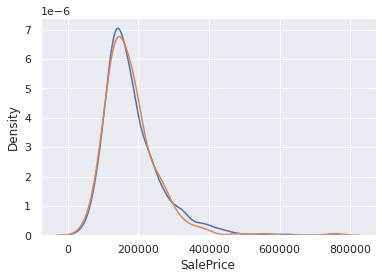

In [ ]:
sns.kdeplot(y_train)
sns.kdeplot(y_test)

In [ ]:
import catboost
from catboost import CatBoostRegressor
import shap
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import sklearn

cat_features = list(X_train.columns)
train_pool = catboost.Pool(
    X_train,
    label=y_train,
    cat_features=cat_features
)
test_pool = catboost.Pool(
    X_test,
    label=y_test,
    cat_features=cat_features
)


In [ ]:
regressor = CatBoostRegressor()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
params = {'task_type': ['GPU'],
          'iterations': [100, 250, 500, 1000],
          'depth': [1, 2, 3, 4, 5, 6],
          'l2_leaf_reg': [0.2, 0.5, 1, 3],
          'random_seed': [2021]
         }
grid_search = regressor.grid_search(params, train_pool)
#grid_search.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
13:	learn: 143990.9994580	test: 136916.6557502	best: 136916.6557502 (13)	total: 697ms	remaining: 49.1s
14:	learn: 141042.4197072	test: 133819.4317074	best: 133819.4317074 (14)	total: 746ms	remaining: 49s
15:	learn: 138214.5133774	test: 130851.0274078	best: 130851.0274078 (15)	total: 815ms	remaining: 50.1s
16:	learn: 135499.7732178	test: 127994.2147069	best: 127994.2147069 (16)	total: 869ms	remaining: 50.2s
17:	learn: 132885.1212020	test: 125160.5088686	best: 125160.5088686 (17)	total: 917ms	remaining: 50.1s
18:	learn: 130383.7088674	test: 122511.0083778	best: 122511.0083778 (18)	total: 960ms	remaining: 49.6s
19:	learn: 127983.7421452	test: 119954.9383109	best: 119954.9383109 (19)	total: 1.01s	remaining: 49.6s
20:	learn: 125680.8806024	test: 117449.9326292	best: 117449.9326292 (20)	total: 1.08s	remaining: 50.3s
21:	learn: 123474.7837844	test: 115089.3003547	best: 115089.3003547 (21)	total: 1.13s	remaining: 50.3s
22:	lea

In [ ]:
grid_search['params']

{'depth': 6,
 'iterations': 1000,
 'l2_leaf_reg': 1,
 'random_seed': 2021,
 'task_type': 'GPU'}

In [ ]:
test_pred = regressor.predict(test_pool)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
rmse = (mean_squared_error(y_test, test_pred))
r2 = r2_score(y_test, test_pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 914289752.06
R2: 0.84


In [ ]:
holdout_pred = regressor.predict(holdout)
submission = pd.DataFrame(holdout_id, columns = ['Id'])
submission['SalePrice'] = holdout_pred 
submission.head()

,Id,SalePrice
0,1461,127142.336528
1,1462,157955.967441
2,1463,180009.603202
3,1464,198243.006645
4,1465,231833.438156


In [ ]:
submission.to_csv("result.csv", index = False, header = True)

Результат данной модели на holdout выборке выглядит следкющим образом

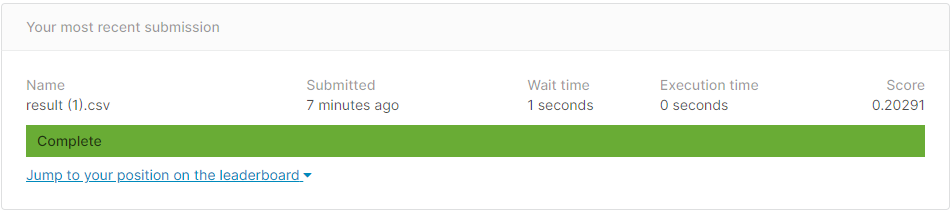

In [ ]:
shap_info = regressor.get_feature_importance(
    data=train_pool, 
    type='ShapValues', 
    verbose=10000
)
shap_values = shap_info[:,:-1]
base_values = shap_info[:,-1]

Processing trees...
128/1000 trees processed	passed time: 29ms	remaining time: 198ms
1000/1000 trees processed	passed time: 161ms	remaining time: 0us
Processing documents...
128/1168 documents processed	passed time: 17.4ms	remaining time: 142ms
1168/1168 documents processed	passed time: 158ms	remaining time: 0us


In [ ]:
shap_values.shape

(1168, 72)

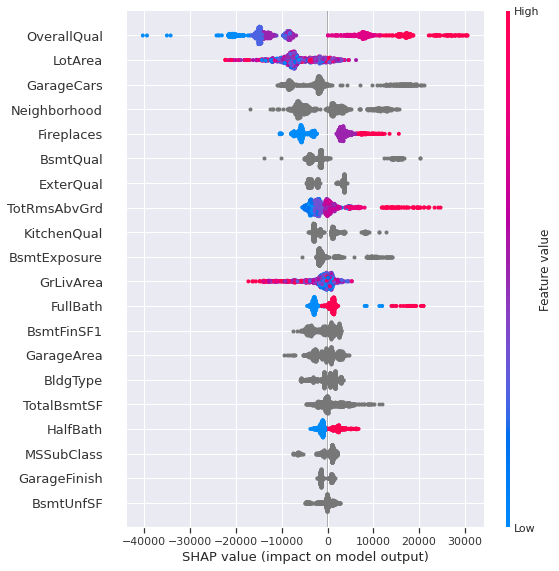

In [ ]:
shap.summary_plot(shap_values, X_train)